In [10]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# 将src目录添加到Python路径中，这样我们就可以导入自定义模块
# 假设你的notebook在 notebooks/3_development/ 目录下
# '..' 会回到 notebooks/ 目录
# '..' 再次会回到项目根目录
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.dataset import LungCancerDataset
from src.transforms import get_transforms

In [11]:
DATA_DIR = os.path.join(project_root, "data/2_final_h5/")
PARTICIPANTS_PATH = os.path.join(project_root, "metadata/participants.tsv")
TASKS_PATH = os.path.join(project_root, "metadata/tasks.json")
SPLITS_PATH = os.path.join(project_root, "metadata/splits.json")
LESION_INFO_PATH = os.path.join(project_root, "metadata/lesion_slice_info.json")
TASK_NAME = "ADC_vs_SCC"
FOLD = 0

In [12]:
# Initialize the training dataset
print("--- Initializing training dataset ---")

train_transform = get_transforms(mode='train')

train_dataset = LungCancerDataset(
    data_dir=DATA_DIR,
    participants_path=PARTICIPANTS_PATH,
    tasks_path=TASKS_PATH,
    splits_path=SPLITS_PATH,
    lesion_info_path=LESION_INFO_PATH,
    task_name=TASK_NAME,
    fold=FOLD,
    mode='train',
    transform=train_transform
)
print(f"Train dataset size: {len(train_dataset)}")
print(f"Train class distribution: {train_dataset.get_class_distribution()}")

--- Initializing training dataset ---
[Dataset初始化] 加载元数据文件...
  ✓ 加载参与者信息: 1061 个受试者
  ✓ 加载任务配置: ['3-class_classification', 'ADC_vs_SCC', 'NSCLC_vs_SCLC']
  ✓ 加载交叉验证划分: 5 折
  ✓ 加载病灶切片信息: 1030 个受试者

[任务配置] 任务: ADC_vs_SCC, 折数: 0, 模式: train
  ✓ 标签映射: {'ADC': 0, 'SCC': 1}
  ✓ 任务病理类型: {'ADC', 'SCC'}

[数据划分] Fold 0, Mode: train
  ✓ 合并其他4个fold的val集: 824 个受试者
  ✓ 第一次筛选后: 824 个受试者有标签信息
  ✓ 第二次筛选: 排除了 100 个不在任务范围内的病理类型
  ✓ 最终train集受试者数: 724
  ✓ 受试者病理分布: {'SCC': 265, 'ADC': 459}

[构建样本列表]
  ✓ 有病灶切片的受试者: 723
  ✓ 无病灶切片的受试者: 1
  ✓ 总样本数(切片数): 13597
  ✓ 类别分布: {1: 4800, 0: 8797}
Train dataset size: 13597
Train class distribution: {1: 4800, 0: 8797}


In [13]:
# Cell 4: 随机获取一个训练样本并检查
print("\n--- Checking a random training sample ---")
if len(train_dataset) > 0:
    random_idx = np.random.randint(0, len(train_dataset))
    inputs, label = train_dataset[random_idx]

    print(f"Sample Index: {random_idx}")
    print(f"Inputs keys: {inputs.keys()}")
    print(f"CT shape: {inputs['ct'].shape}, dtype: {inputs['ct'].dtype}")
    print(f"PET shape: {inputs['pet'].shape}, dtype: {inputs['pet'].dtype}")
    print(f"Mask shape: {inputs['mask'].shape}, dtype: {inputs['mask'].dtype}")
    print(f"Label: {label}, dtype: {label.dtype}")
    print(f"CT value range: [{inputs['ct'].min():.2f}, {inputs['ct'].max():.2f}]")
    print(f"PET value range: [{inputs['pet'].min():.2f}, {inputs['pet'].max():.2f}]")
    print(f"Mask value range: [{inputs['mask'].min():.2f}, {inputs['mask'].max():.2f}]")


--- Checking a random training sample ---


Sample Index: 4901
Inputs keys: dict_keys(['ct', 'pet', 'mask'])
CT shape: torch.Size([3, 224, 224]), dtype: torch.float32
PET shape: torch.Size([3, 224, 224]), dtype: torch.float32
Mask shape: torch.Size([1, 224, 224]), dtype: torch.float32
Label: 0, dtype: torch.int64
CT value range: [0.00, 1.00]
PET value range: [0.00, 0.34]
Mask value range: [0.00, 1.00]


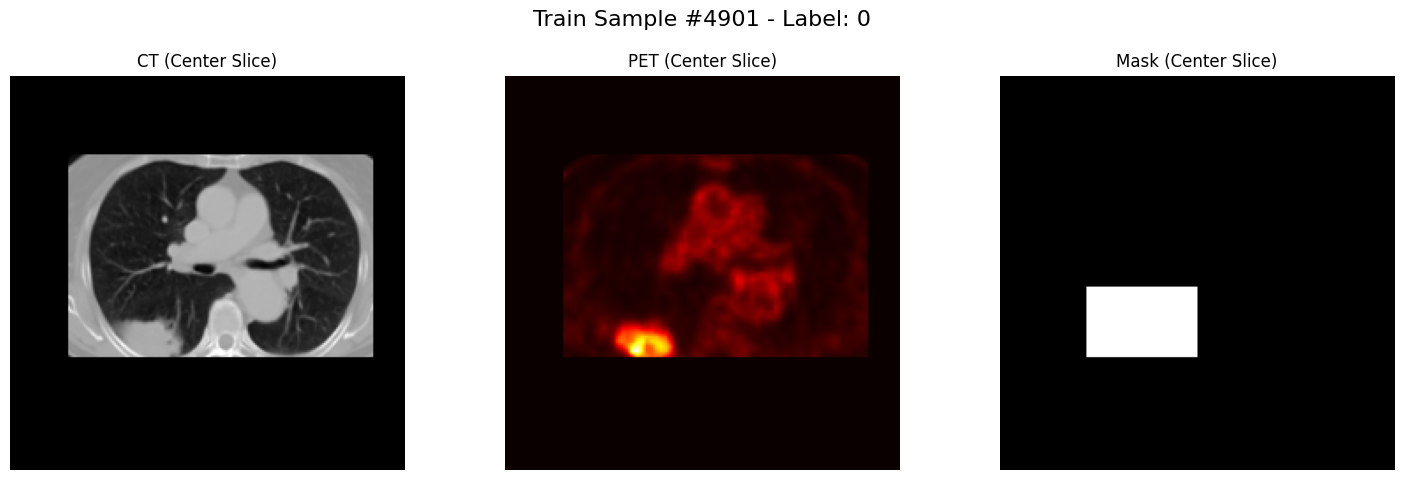

In [14]:
# Cell 5: 可视化这个样本
# 在Notebook中，plt.show()会自动将图像内嵌显示在下方
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Train Sample #{random_idx} - Label: {label.item()}", fontsize=16)

axes[0].imshow(inputs['ct'][1, :, :].cpu().numpy(), cmap='gray')
axes[0].set_title("CT (Center Slice)")
axes[0].axis('off')

axes[1].imshow(inputs['pet'][1, :, :].cpu().numpy(), cmap='hot')
axes[1].set_title("PET (Center Slice)")
axes[1].axis('off')

axes[2].imshow(inputs['mask'][0, :, :].cpu().numpy(), cmap='gray')
axes[2].set_title("Mask (Center Slice)")
axes[2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 调整布局以适应标题
plt.show()


--- Initializing validation dataset ---
[Dataset初始化] 加载元数据文件...
  ✓ 加载参与者信息: 1061 个受试者
  ✓ 加载任务配置: ['3-class_classification', 'ADC_vs_SCC', 'NSCLC_vs_SCLC']
  ✓ 加载交叉验证划分: 5 折
  ✓ 加载病灶切片信息: 1030 个受试者

[任务配置] 任务: ADC_vs_SCC, 折数: 0, 模式: val
  ✓ 标签映射: {'ADC': 0, 'SCC': 1}
  ✓ 任务病理类型: {'ADC', 'SCC'}

[数据划分] Fold 0, Mode: val
  ✓ 从Fold 0的val集获取: 206 个受试者
  ✓ 第一次筛选后: 206 个受试者有标签信息
  ✓ 第二次筛选: 排除了 25 个不在任务范围内的病理类型
  ✓ 最终val集受试者数: 181
  ✓ 受试者病理分布: {'ADC': 115, 'SCC': 66}

[构建样本列表]
  ✓ 有病灶切片的受试者: 181
  ✓ 无病灶切片的受试者: 0
  ✓ 总样本数(切片数): 3370
  ✓ 类别分布: {0: 2308, 1: 1062}
Validation dataset size: 3370
Validation class distribution: {0: 2308, 1: 1062}

--- Checking a random validation sample ---


Sample Index: 1304
Inputs keys: dict_keys(['ct', 'pet', 'mask'])
CT shape: torch.Size([3, 224, 224]), dtype: torch.float32
PET shape: torch.Size([3, 224, 224]), dtype: torch.float32
Mask shape: torch.Size([1, 224, 224]), dtype: torch.float32
Label: 0, dtype: torch.int64
CT value range: [0.00, 1.00]
PET value range: [0.00, 0.13]
Mask value range: [0.00, 1.00]


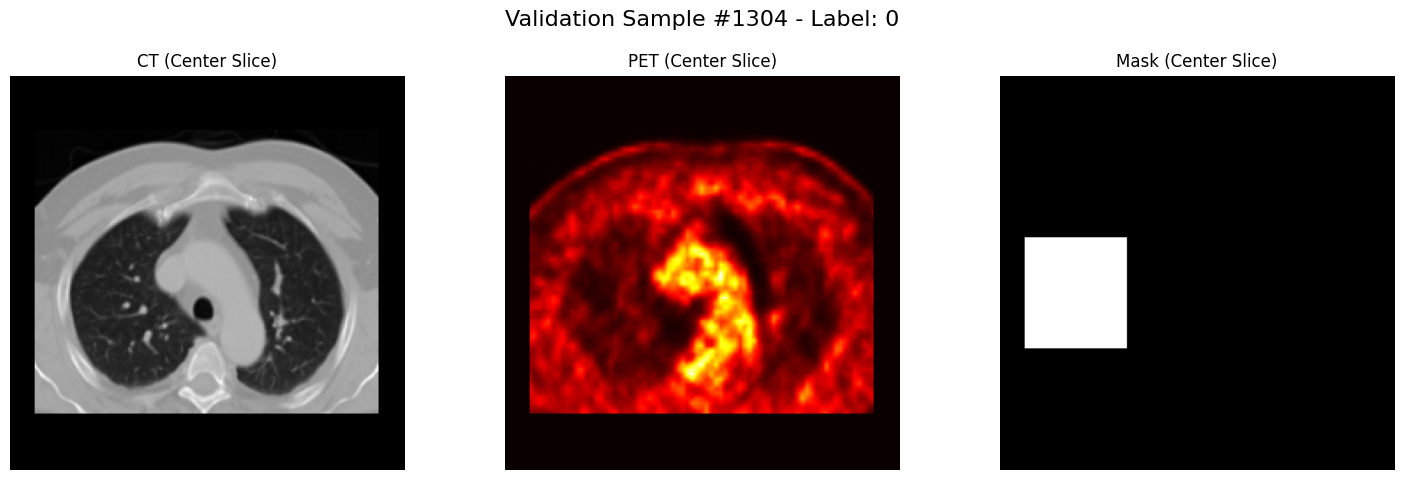

In [15]:
# cell 6: 初始化验证集并检查
print("\n--- Initializing validation dataset ---")
val_transform = get_transforms(mode='val')
val_dataset = LungCancerDataset(
    data_dir=DATA_DIR,
    participants_path=PARTICIPANTS_PATH,
    tasks_path=TASKS_PATH,
    splits_path=SPLITS_PATH,
    lesion_info_path=LESION_INFO_PATH,
    task_name=TASK_NAME,
    fold=FOLD,
    mode='val',
    transform=val_transform
)
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Validation class distribution: {val_dataset.get_class_distribution()}")

# 随机获取一个验证样本并检查
print("\n--- Checking a random validation sample ---")
if len(val_dataset) > 0:
    random_idx = np.random.randint(0, len(val_dataset))
    inputs, label = val_dataset[random_idx]

    print(f"Sample Index: {random_idx}")
    print(f"Inputs keys: {inputs.keys()}")
    print(f"CT shape: {inputs['ct'].shape}, dtype: {inputs['ct'].dtype}")
    print(f"PET shape: {inputs['pet'].shape}, dtype: {inputs['pet'].dtype}")
    print(f"Mask shape: {inputs['mask'].shape}, dtype: {inputs['mask'].dtype}")
    print(f"Label: {label}, dtype: {label.dtype}")
    print(f"CT value range: [{inputs['ct'].min():.2f}, {inputs['ct'].max():.2f}]")
    print(f"PET value range: [{inputs['pet'].min():.2f}, {inputs['pet'].max():.2f}]")
    print(f"Mask value range: [{inputs['mask'].min():.2f}, {inputs['mask'].max():.2f}]")

# 可视化这个验证样本
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Validation Sample #{random_idx} - Label: {label.item()}", fontsize=16)

axes[0].imshow(inputs['ct'][1, :, :].cpu().numpy(), cmap='gray')
axes[0].set_title("CT (Center Slice)")
axes[0].axis('off')

axes[1].imshow(inputs['pet'][1, :, :].cpu().numpy(), cmap='hot')
axes[1].set_title("PET (Center Slice)")
axes[1].axis('off')

axes[2].imshow(inputs['mask'][0, :, :].cpu().numpy(), cmap='gray')
axes[2].set_title("Mask (Center Slice)")
axes[2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 调整布局以适应标题
plt.show()